# Prosper Loan Data Exploration
## by Chukwume Ijeh

## Preliminary Wrangling

> This document explores a dataset originally containing 113,937 loan entries with 81 variables on each entry, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
df_loan.shape

(113937, 81)

In [4]:
# high-level overview of data composition
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
# Subset the dataframe by selecting features of interest
cols = ['ListingCreationDate','ProsperScore', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'CurrentDelinquencies']
df_sub = df_loan[cols]

In [6]:
df_sub.dtypes

ListingCreationDate       object
ProsperScore             float64
IsBorrowerHomeowner         bool
CreditScoreRangeLower    float64
LoanOriginalAmount         int64
BorrowerAPR              float64
StatedMonthlyIncome      float64
DebtToIncomeRatio        float64
Term                       int64
ProsperRating (Alpha)     object
EmploymentStatus          object
CurrentDelinquencies     float64
dtype: object

In [7]:
# Convert listing creation date to datetime
df_sub['ListingCreationDate'] = pd.to_datetime(df_sub['ListingCreationDate'])

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# Select loan entries that occurred after July, 2009
df_sub = df_sub[df_sub['ListingCreationDate'] >= '2009-08-1']

In [9]:
# Remove loans with missing borrower APR information
df_sub = df_sub[~df_sub.BorrowerAPR.isna()]

In [10]:
df_sub.head()

,ListingCreationDate,ProsperScore,IsBorrowerHomeowner,CreditScoreRangeLower,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,DebtToIncomeRatio,Term,ProsperRating (Alpha),EmploymentStatus,CurrentDelinquencies
1,2014-02-27 08:28:07.900,7.0,False,680.0,10000,0.12016,6125.000000,0.18,36,A,Employed,0.0
3,2012-10-22 11:02:35.010,9.0,True,800.0,10000,0.12528,2875.000000,0.15,36,A,Employed,4.0
4,2013-09-14 18:38:39.097,4.0,True,680.0,15000,0.24614,9583.333333,0.26,36,D,Employed,0.0
5,2013-12-14 08:26:37.093,10.0,True,740.0,15000,0.15425,8333.333333,0.36,60,B,Employed,0.0
6,2013-04-12 09:52:56.147,2.0,False,680.0,3000,0.31032,2083.333333,0.27,36,E,Employed,0.0


In [11]:
# descriptive statistics for numeric variables
df_sub.describe()

,ProsperScore,CreditScoreRangeLower,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,DebtToIncomeRatio,Term,CurrentDelinquencies
count,84672.000000,84672.000000,84672.000000,84672.000000,8.467200e+04,77391.000000,84672.000000,84672.000000
mean,5.945165,699.375945,9094.024341,0.226738,5.933452e+03,0.258813,42.500000,0.322397
std,2.375376,47.070306,6288.611188,0.079889,8.247730e+03,0.318611,11.648913,1.110787
min,1.000000,600.000000,1000.000000,0.049350,0.000000e+00,0.000000,12.000000,0.000000
25%,4.000000,660.000000,4000.000000,0.163610,3.441667e+03,0.150000,36.000000,0.000000
50%,6.000000,700.000000,7500.000000,0.219450,5.000000e+03,0.220000,36.000000,0.000000
75%,8.000000,720.000000,13750.000000,0.292540,7.083333e+03,0.320000,60.000000,0.000000
max,11.000000,880.000000,35000.000000,0.423950,1.750003e+06,10.010000,60.000000,51.000000


In [12]:
df_sub.shape

(84672, 12)

#### What is the structure of your dataset?

> The new dataset contains 84,672 loan entries with 12 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others).

### What is/are the main feature(s) of interest in your dataset?

> This project is most interested in figuring out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the following features: Borrowers stated monthly income, loan term, total loan amount, prosper rating, prosper score, employment status and others will help support investigation into borrower's APR.

## Univariate Exploration

> Let's start by converting all column names to lower case and then look at the distribution of the main variable of interest: borrower APR.

In [13]:
df_sub.columns = map(str.lower, df_sub.columns)

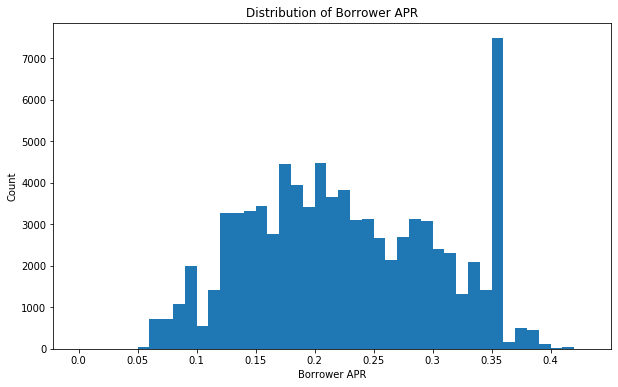

In [14]:
bins = np.arange(0, df_sub.borrowerapr.max()+0.01, 0.01)
plt.figure(figsize=[10, 6])
plt.hist(data = df_sub, x = 'borrowerapr', bins = bins)
ticks = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
plt.xticks(ticks, ticks)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Distribution of Borrower APR');

> There is a very distinct peak between 0.35 and 0.36. 

In [15]:
# Check loans with APR between 0.35 and 0.36
df_sub[(df_sub['borrowerapr'] >= 0.35) & (df_sub['borrowerapr'] <= 0.36)]

,listingcreationdate,prosperscore,isborrowerhomeowner,creditscorerangelower,loanoriginalamount,borrowerapr,statedmonthlyincome,debttoincomeratio,term,prosperrating (alpha),employmentstatus,currentdelinquencies
15,2012-04-10 09:14:46.297,5.0,True,700.0,4000,0.35797,5500.000000,0.49,36,HR,Other,0.0
22,2013-01-30 09:36:13.783,2.0,False,700.0,4000,0.35356,118.333333,9.20,36,HR,Other,0.0
31,2012-09-21 13:37:43.210,5.0,False,680.0,2000,0.35797,2250.000000,0.04,36,HR,Other,0.0
67,2011-03-25 17:20:01.857,3.0,False,600.0,3000,0.35843,4777.000000,0.28,12,E,Employed,0.0
71,2012-10-23 13:43:45.530,4.0,True,760.0,2774,0.35797,2916.666667,0.53,36,HR,Employed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
113875,2011-11-16 09:19:53.293,4.0,True,720.0,5000,0.35132,4702.166667,0.19,36,E,Employed,6.0
113905,2011-11-15 15:32:05.890,2.0,True,740.0,4000,0.35797,3250.000000,0.35,36,HR,Employed,0.0
113907,2013-11-09 06:55:05.690,2.0,False,640.0,4000,0.35356,2166.666667,0.40,36,HR,Employed,1.0
113908,2010-11-29 10:40:09.730,5.0,False,700.0,7500,0.35858,2833.333333,NaN,36,E,Employed,0.0


> From the above table, there appears to be a total of 7000 loan entries that fall within this range with varying features.

> Next up, look at the distribution of a predictor variable of interest: loan original amount

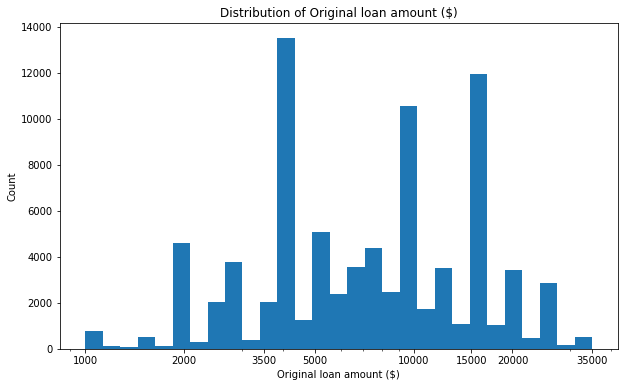

In [16]:
MIN = df_sub['loanoriginalamount'].min()
MAX = df_sub['loanoriginalamount'].max()

bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 30)
plt.figure(figsize=[10, 6])
plt.hist(data = df_sub, x = 'loanoriginalamount', bins=bins)
plt.xscale('log')
ticks = [1000, 2000, 3500, 5000, 10000, 15000, 20000, 35000]
plt.xticks(ticks, ticks)
plt.xlabel('Original loan amount ($)')
plt.ylabel('Count')
plt.title('Distribution of Original loan amount ($)');

> The distribution of original loan amount looks multimodal. The most frequent loans fall somewhat between the ranges of \\$1900 - \\$2000, \\$3500 - \\$5000, \\$9000 - \\$10000, \\$15000 - \\$16000.

> Next up: stated monthly income

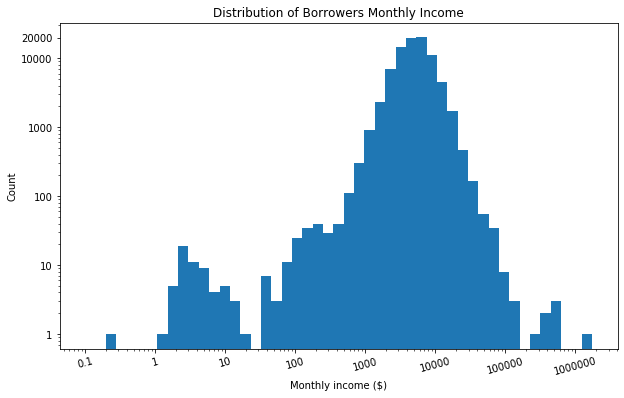

In [17]:
# Distribution of stated monthly income
# A value is added to MIN due to error caused by dividing by 0
MIN = df_sub['statedmonthlyincome'].min() + 0.1
MAX = df_sub['statedmonthlyincome'].max()

plt.figure(figsize=(10,6))
bins = 10 ** np.linspace(np.log10(MIN), np.log10(MAX), 50)
plt.hist(data = df_sub, x = 'statedmonthlyincome', bins=bins)
plt.xscale('log')
plt.yscale('log')
xticks= [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
yticks = [1, 10, 100, 1000, 10000, 20000]
plt.xticks(xticks, xticks, rotation=15)
plt.yticks(yticks, yticks)
plt.title('Distribution of Borrowers Monthly Income')
plt.xlabel('Monthly income ($)')
plt.ylabel('Count');

> Before applying the log transformation to the x axis, the distribution was severely right skewed. Now, majority of borrowers appear to earn around \\$10,000.

> There appears to be a wide disparity in the stated monthly income of loan entries as a result of the presnece of outliers. Outliers above \\$100k will be removed. 

> Does the stated monthly income greatly impact the borrower's APR?

In [18]:
# Check some features of borrowers with stated monthly income greater than $100,000
df_sub[df_sub.statedmonthlyincome>1e5]

,listingcreationdate,prosperscore,isborrowerhomeowner,creditscorerangelower,loanoriginalamount,borrowerapr,statedmonthlyincome,debttoincomeratio,term,prosperrating (alpha),employmentstatus,currentdelinquencies
8066,2011-04-02 13:58:32.227,4.0,True,660.0,2000,0.35643,4.166667e+05,0.00,36,HR,Employed,5.0
17411,2011-04-08 21:58:21.847,5.0,True,660.0,7500,0.35643,4.833333e+05,0.00,36,E,Employed,0.0
35218,2010-06-01 18:34:31.423,10.0,True,860.0,1000,0.07389,1.083333e+05,NaN,36,AA,Full-time,0.0
45028,2012-05-15 12:49:18.987,2.0,False,620.0,4000,0.33973,1.500000e+05,NaN,36,E,Self-employed,2.0
53014,2013-01-04 20:02:24.207,3.0,True,720.0,4000,0.25785,6.185478e+05,NaN,12,D,Self-employed,0.0
53167,2012-02-20 12:53:44.577,4.0,True,740.0,4000,0.35797,1.750003e+06,NaN,36,HR,Self-employed,0.0
57133,2011-03-24 14:50:00.220,5.0,True,680.0,4000,0.35643,4.666667e+05,0.00,36,E,Employed,1.0
59298,2012-02-13 07:43:35.380,6.0,False,760.0,15000,0.24246,1.208333e+05,NaN,36,C,Self-employed,0.0
80075,2014-01-14 17:01:25.710,6.0,True,700.0,25000,0.20217,1.583333e+05,0.05,36,C,Employed,0.0
82831,2012-09-11 23:56:44.900,3.0,True,700.0,4000,0.31012,2.500000e+05,NaN,36,E,Self-employed,0.0


In [19]:
# remove loans with stated monthly income greater than $100,000
df_sub = df_sub[df_sub.statedmonthlyincome<=100000]

In [20]:
(df_sub.statedmonthlyincome>100000).sum()

0

> Look at distributions of term, Prosper rating, prosper score, employment status and whether or not borrower is a home owner.

In [21]:
# Convert 'isborrowerhomeowner' to string
df_sub['isborrowerhomeowner'] = df_sub['isborrowerhomeowner'].astype(str)

In [22]:
# Convert Prosper Rating, Prosper Score, Employment status and Isborrowerhomeowner into ordered categorical types
ordinal_var_dict = {'prosperrating (alpha)': ['HR','E','D','C','B','A','AA'],
                    'prosperscore': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],
                    'employmentstatus': ['Employed','Self-employed','Not employed','Full-time','Part-time','Retired','Other','Not available'],
                   'isborrowerhomeowner': ['True', 'False']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_sub[var] = df_sub[var].astype(ordered_var)

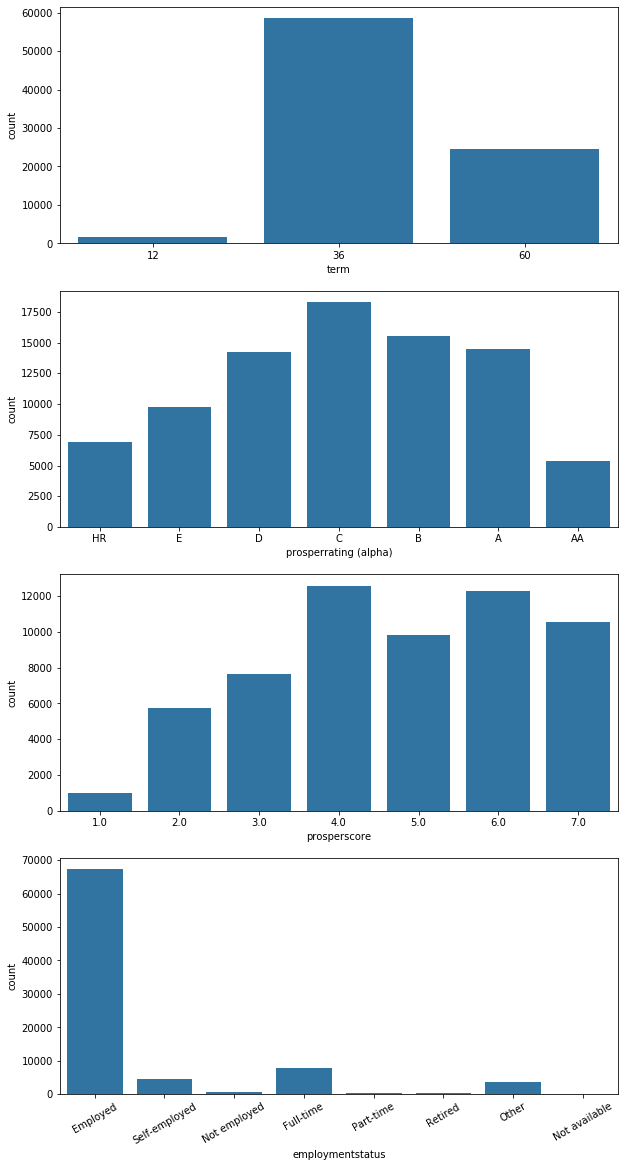

In [23]:
fig, ax = plt.subplots(nrows=4, figsize = [10,20])

base_color = sb.color_palette()[0]

sb.countplot(data = df_sub, x = 'term', color = base_color, ax = ax[0])
sb.countplot(data = df_sub, x = 'prosperrating (alpha)', color = base_color, ax = ax[1])
sb.countplot(data = df_sub, x = 'prosperscore', color = base_color, ax = ax[2])
sb.countplot(data = df_sub, x = 'employmentstatus', color = base_color, ax = ax[3]);
plt.xticks(rotation=30);

> Majority of the loans are for 36months while very few are for 12months. This could be attributed to the loan amount (and other factors).

> The distribution of prosper rating seems quite normally distributed with majority of borrowers having a C rating.

> The distribution of prosper score seems quite left-skewed with majority of borrowers having high prosper scores.

> Majority of borrowers appear to be employed. 

> Lastly, we will look at one more feature, if the borrower is a homeowner or not.

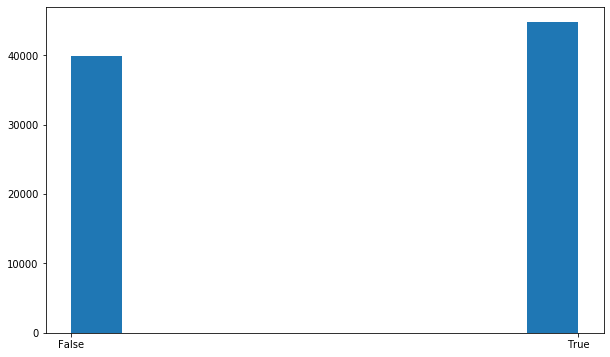

In [24]:
plt.figure(figsize=(10,6))
plt.hist(data=df_sub, x='isborrowerhomeowner');

> Distribution of borrowers that are home owners or not is fairly the same. This may not have much effect on the borrowers APR.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of Borrower APR seemed fairly multimodal except for the distinct peak between 0.35 and 0.36.  There was no need to perform any transformations, however. In summary, majority of borrowers definitely appear to have an APR between 0.35 and 0.36.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was a very wide disparity in original loan amounts. Because of this, I needed to perform a log transformation on loan amounts. The distribution of loan amounts looked multimodal.
> For borrower's monthly income distribution, there appeared to be a number of outliers with incomes over \\$100k. These entries were removed from the dataset. Both x and y axes needed to be transformed due to the large difference in minimum and maximum values.

## Bivariate Exploration

> To start off with, let's look at the pairwise correlations present between features in the data.

In [25]:
num_vars = ['loanoriginalamount', 'borrowerapr', 'statedmonthlyincome']
cat_vars = ['term', 'prosperrating (alpha)', 'prosperscore', 'employmentstatus', 'isborrowerhomeowner']

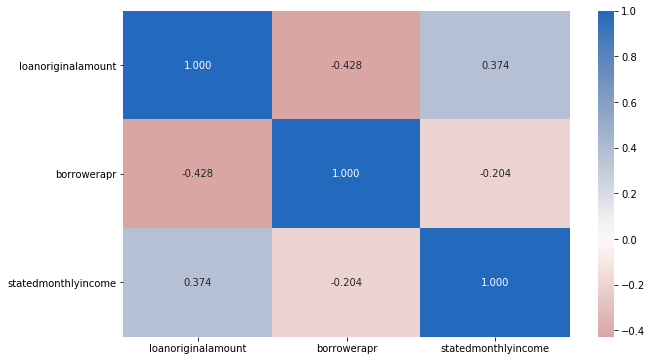

In [26]:
# correlation plot between numeric features
plt.figure(figsize = [10, 6])
sb.heatmap(df_sub[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.yticks(rotation=0);

> There appears to be a negative correlation between loan amount and APR, although not so strong. This means that as loan amount increases, APR reduces and vice versa. 

> Also, there appears to be a slightly positive correlation between loan amount and monthly income. This makes sense since people who earn more have the ability to loan higher amounts of money.

>It appears that APR tends to reduce with increase in monthly income. However, this is not a strong correlation.

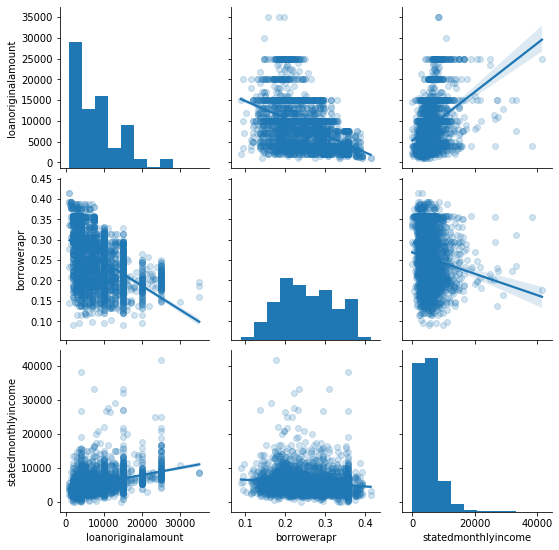

In [27]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
df_subsamp = df_sub.sample(5000)
g = sb.PairGrid(data = df_subsamp.dropna(), vars = num_vars)
g = g.map_diag(plt.hist)
g.map_offdiag(sb.regplot, scatter_kws = {'alpha': 0.2});

> The above plot matrix collaborates the initial comments stated earlier. The higher the loan, the lower the APR. Monthly income and borrower APR appear not to have so much correlation.

> Also, loan amount and monthly income have a posiitve correlation. This makes sense since people who earn more can loan more money.

> There does not seem to be much correlation between monthly income and borrower APR. This collaborates the very weak, negative correlation seen in the heatmap above.

Let's move on to looking at how borrower APR, stated monthly income and loan original amount correlate with the categorical variables.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


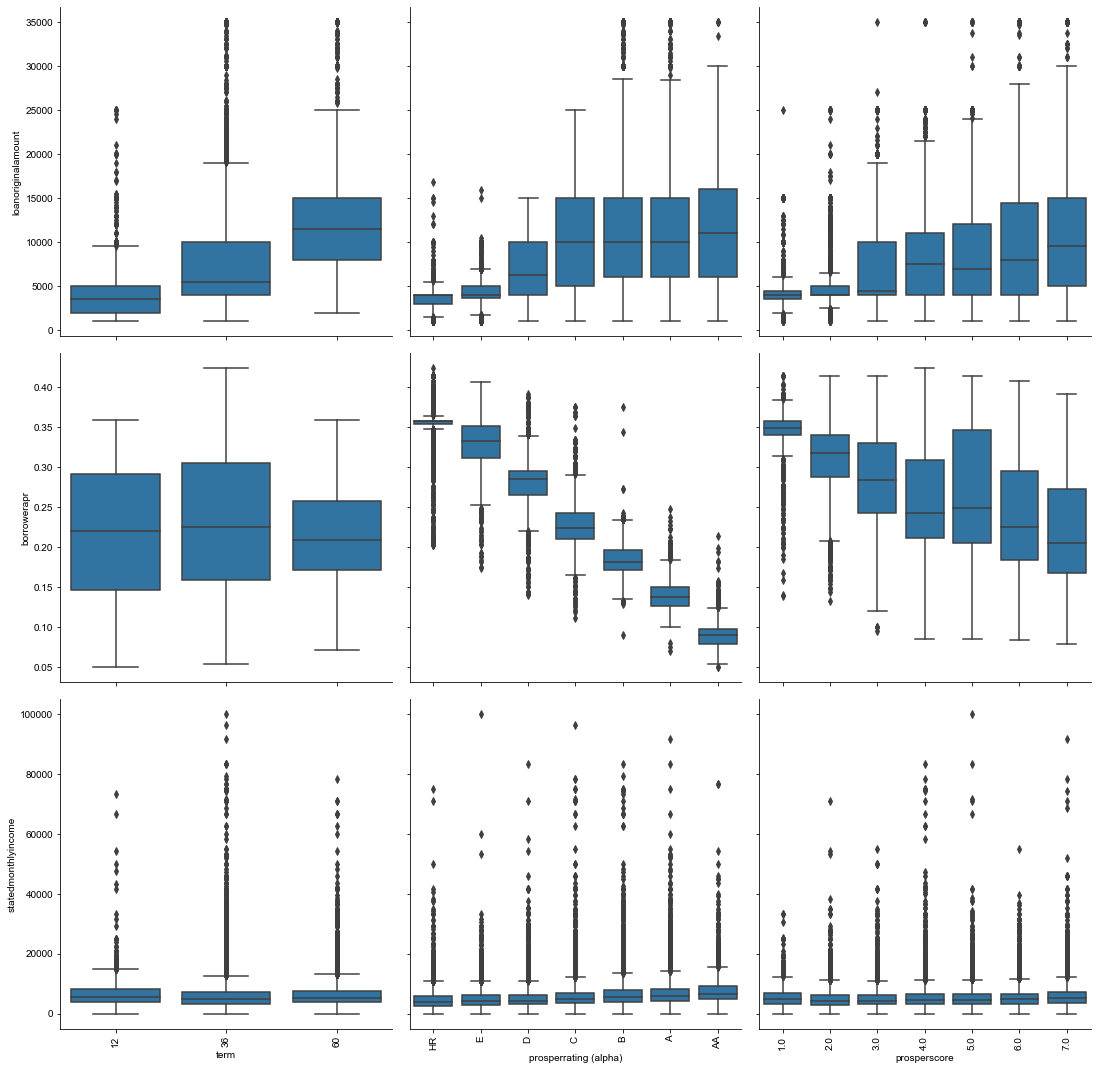

In [28]:
# plot matrix of numeric features against some categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)

g = sb.PairGrid(data = df_sub, y_vars = num_vars,
                x_vars = ['term', 'prosperrating (alpha)', 'prosperscore'], size = 3, aspect = 1.5)
g.map(boxgrid)
g.fig.set_size_inches(15,15)
sb.set(font_scale=1.5)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

> Borrower's APR and stated Monthly Income do not seem to vary significantly with Term. Borrower APR has a negative correlation with Prosper Rating (Alpha) and Prosper Score.
> Original loan amount appears to have a positive correlation with Term, Prosper Rating (Alpha) and Prosper Score.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


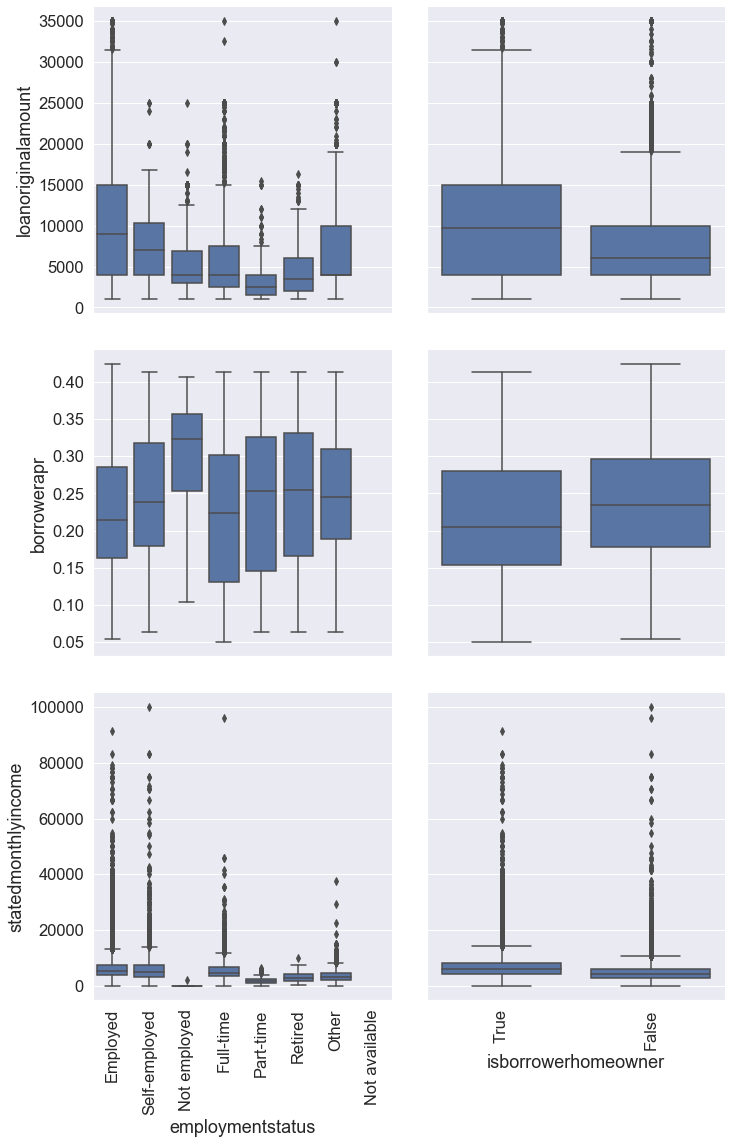

In [29]:
# plot matrix of numeric features against other categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color)

g = sb.PairGrid(data = df_sub, y_vars = num_vars,
                x_vars = ['employmentstatus', 'isborrowerhomeowner'], size = 3, aspect = 1.5)
g.map(boxgrid)
g.fig.set_size_inches(10,15)
sb.set(font_scale=1.5)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat];

> Individuals with "Not employed" status appear to have the highest Borrower APR while those employed have the lowest. Borrower APR is also higher for individuals who not home owners than individuals who are home owners.
> Original loan amounts for individuals who work Part-time are the lowest while those who work Employed are the highest.
> Original loan amounts are also higher for borrowers who are homeowners.

Finally, let's look at relationships between the five categorical features.

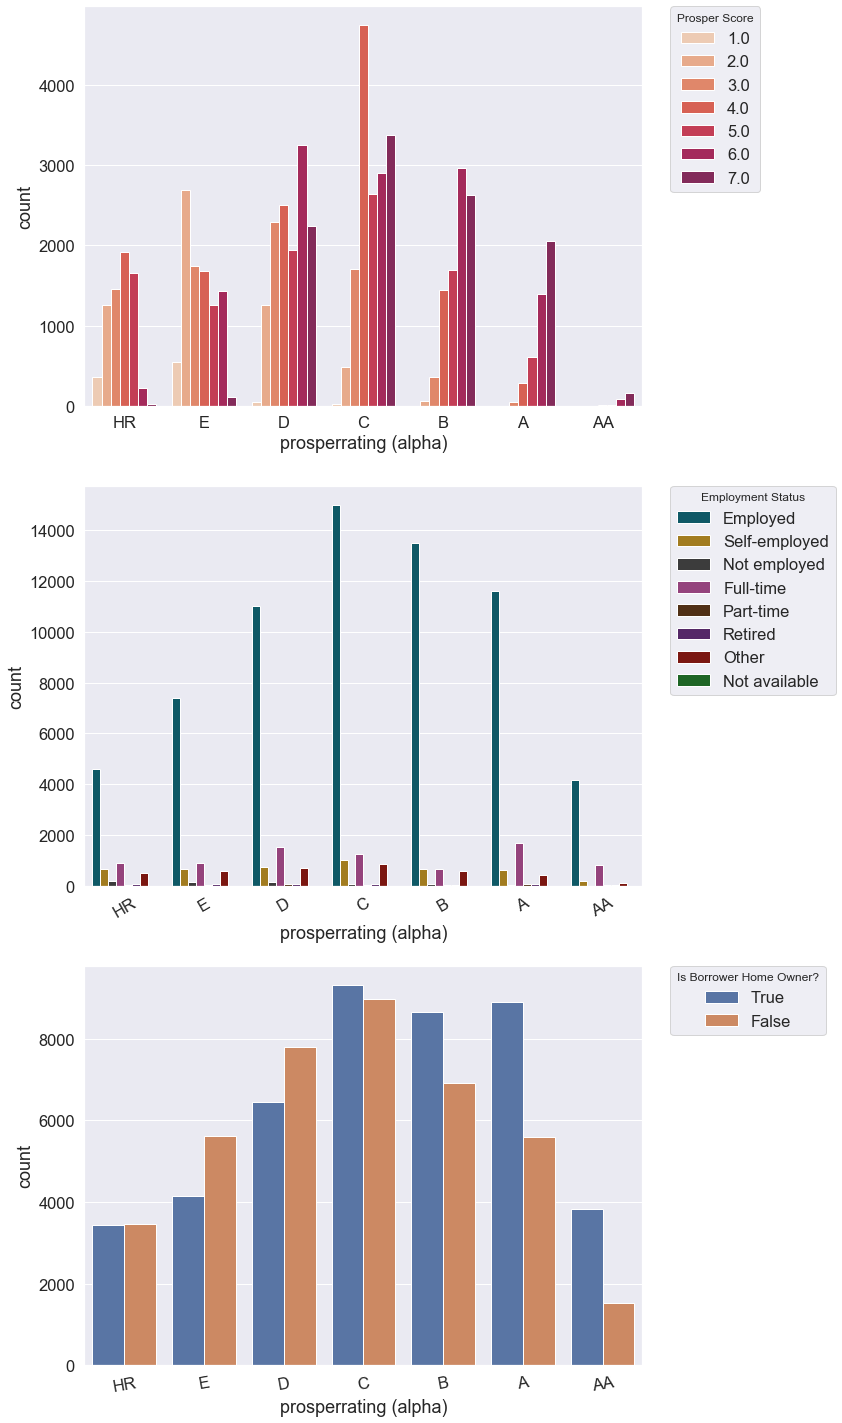

In [30]:
plt.figure(figsize = [10, 25])

# subplot 1: Prosper Rating vs Prosper Score
plt.subplot(3, 1, 1)
sb.countplot(data = df_sub, x = 'prosperrating (alpha)', hue = 'prosperscore', palette = reversed(sb.color_palette("rocket", 10)))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=('Prosper Score'))

# subplot 2: employment status vs prosper rating
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_sub, hue = 'employmentstatus', x = 'prosperrating (alpha)', palette = reversed(sb.color_palette("dark", 10)))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Employment Status')

# subplot 3: Prosper rating vs Isborrowerhomeowner
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_sub, x = 'prosperrating (alpha)', hue = 'isborrowerhomeowner', palette = sb.color_palette("deep", 10))
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = "Is Borrower Home Owner?");

> Majority of entries seem to have a Prosper Rating of C and a Prosper Score of 3.
> Because majority of entries in this dataset are Employed, it is no surprise that 'Employed' dominates all Prosper Rating (Alpha) categories.
> It appears that borrowers that are not home owners have lower Prosper Ratings (Alpha) while those that are home owners have higher Prosper Ratings (Alpha).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrower's APR has a strong negative correlation with Prosper Rating (Alpha) and Prosper Score. It also has a moderately negative correlation between Original Loan Amount and Stated Monthly Income. Borrower's APR appear to be higher for individuals that are not employed and borrowers that are not home owners. Borrower's APR is also slightly higher for loans of 36months than other Terms.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It appears that individuals who are home owners generally have higher Prosper Rating (Alpha) than those who are not. Majority of loan entries have a Prosper Rating (Alpha) of C and a Prosper Score of 3. Individuals who are employed seem to dominate all Prosper Ratings (Alpha), which is not surprising since they take up a large percentage of the dataset.

## Multivariate Exploration

> Let's start by analysing how Borrower APR and Loan Original Amount varies with other features.

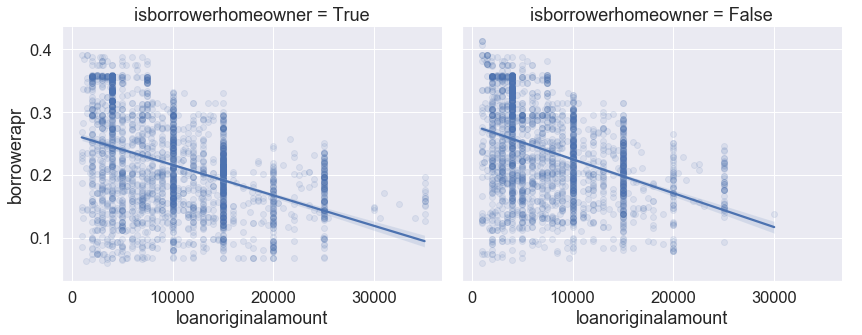

In [31]:
g = sb.FacetGrid(data=df_subsamp, aspect=1.2, height=5, col='isborrowerhomeowner')
g.map(sb.regplot, 'loanoriginalamount', 'borrowerapr', x_jitter=0.04, scatter_kws={'alpha':0.1})
g.add_legend();

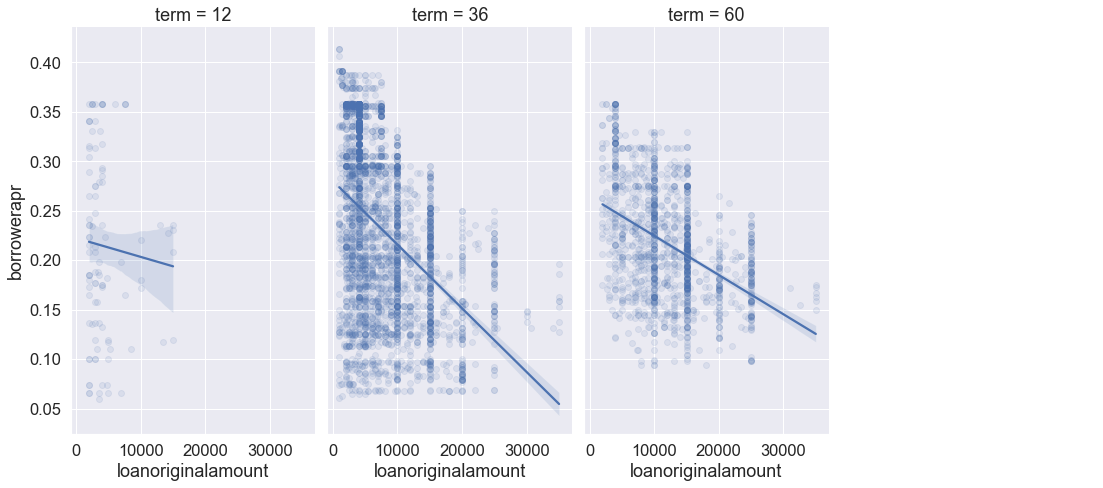

In [32]:
g=sb.FacetGrid(data=df_subsamp, aspect=1.2, height=5, col='term', col_wrap=4)
g.map(sb.regplot, 'loanoriginalamount', 'borrowerapr', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()
g.fig.set_size_inches(15,8);

> Irrespective of term and whether borrower is a homeowner or not, the correlation between Borrower APR and Loan Original Amount is still negative.

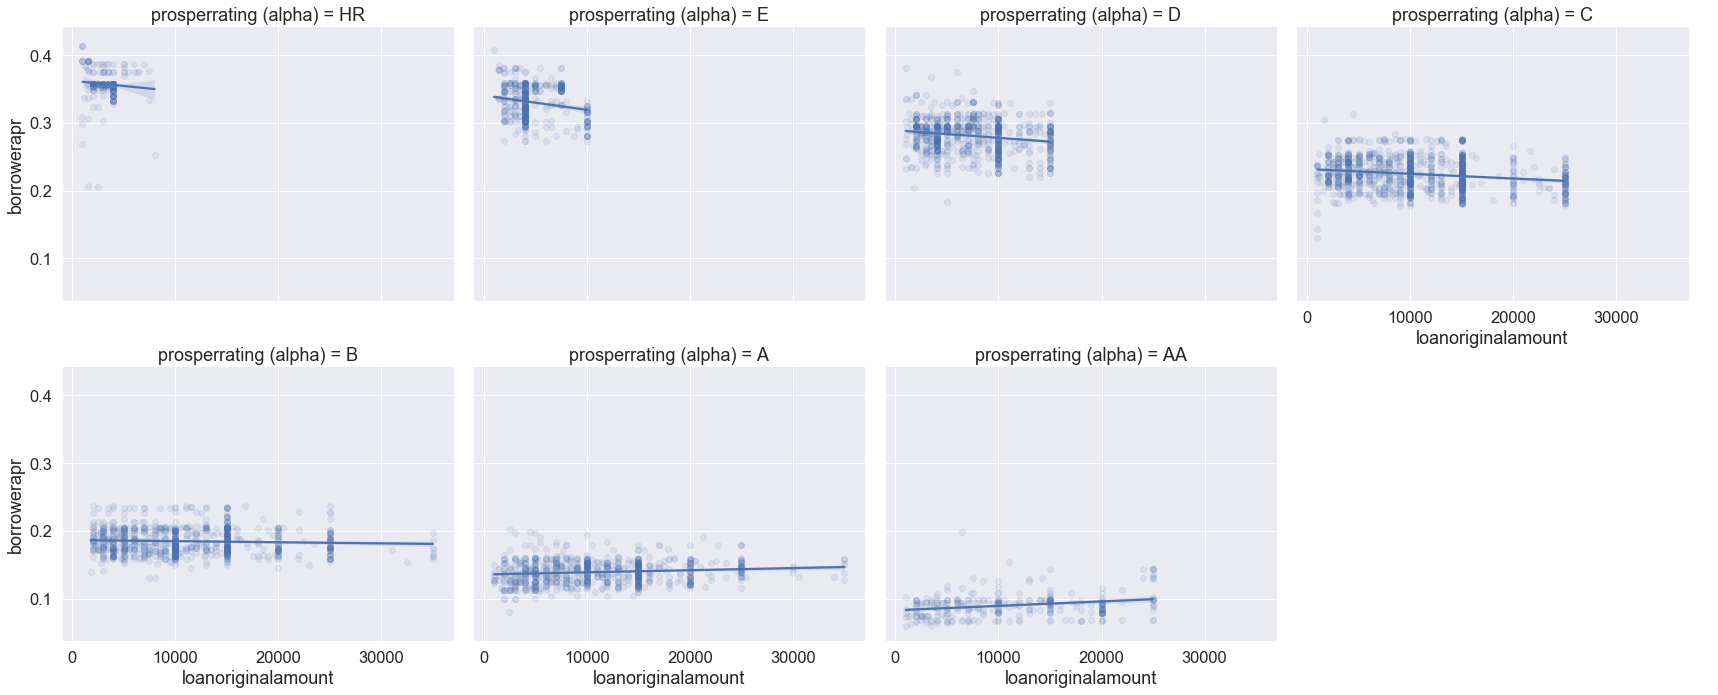

In [33]:
g=sb.FacetGrid(data=df_subsamp, aspect=1.2, height=5, col='prosperrating (alpha)', col_wrap=4)
g.map(sb.regplot, 'loanoriginalamount', 'borrowerapr', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

> It appears that with increase in the Prosper Rating (Alpha), the correlation between Borrower APR and Loan Original Amount goes from slightly negative to slightly positive. It also means that the loan amount increases with better rating. People with lower ratings tend to borrow less, decreasing the APR could encourage them to borrow more and vice versa.

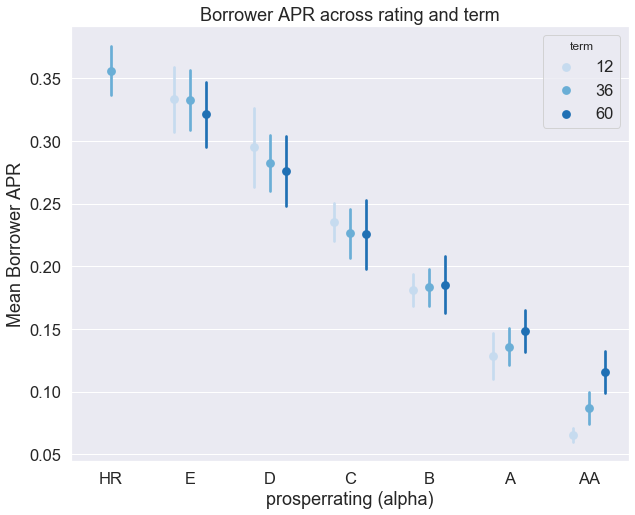

In [36]:
fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = df_sub, x = 'prosperrating (alpha)', y = 'borrowerapr', hue = 'term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

> From the plot above, borrowers with the least Prosper Rating (Alpha) have borrow Term of only 36months. 
> Also, the borrower APR decrease with the increase in Term for people with HR-D ratings. But for people with C-AA ratings, the APR generally increase with increase in borrow Term.

> Lets look at the Rating and Term effects on stated Monthly Income and Loan Original Amount variables

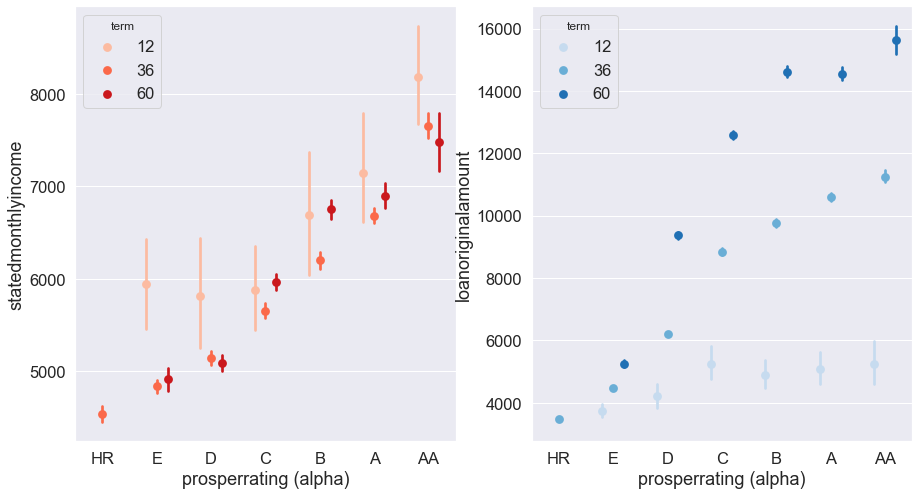

In [43]:
fig, ax = plt.subplots(ncols=2, figsize=[15,8])
sb.pointplot(data = df_sub, x = 'prosperrating (alpha)', y = 'statedmonthlyincome', hue = 'term',
           palette = 'Reds', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df_sub, x = 'prosperrating (alpha)', y = 'loanoriginalamount', hue = 'term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[1]);

> The stated Monthly Income and Prosper Rating definitely have a positive correlation, with the Income of entries for 12months to be the highest. This means that the higher the Monthly Income, the more likely that the entry Term will be just 12months.
> For Loan Amount, there is an interaction between Term and Prosper Rating (Alpha). We can see that with better Prosper rating, the Loan Amount for all three terms increases, the increase amplitude of Loan Amount between Terms also becomes larger.

> Lets look at the Prosper Rating (Alpha) and Isborrowerhomeowner effects on stated MBorrower APR and Loan Original Amount variables

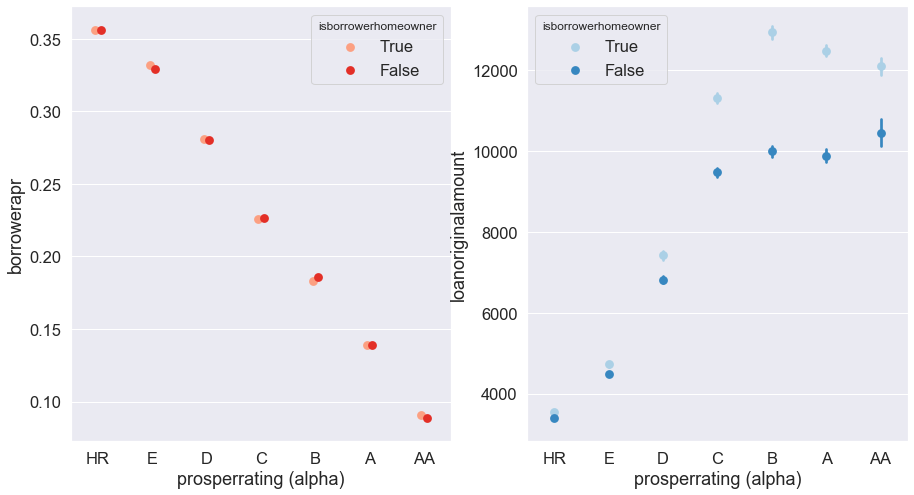

In [48]:
fig, ax = plt.subplots(ncols=2, figsize=[15,8])
sb.pointplot(data = df_sub, x = 'prosperrating (alpha)', y = 'borrowerapr', hue = 'isborrowerhomeowner',
           palette = 'Reds', linestyles = '', dodge = 0.1, ax=ax[0])
sb.pointplot(data = df_sub, x = 'prosperrating (alpha)', y = 'loanoriginalamount', hue = 'isborrowerhomeowner',
           palette = 'Blues', linestyles = '', ax=ax[1]);

> Whether a borrower is a homeowner or not does not seem to have any effect on APR.
> It can also be seen that with better rating, borrowers who are home owners loan larger amounts of money. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of Borrower APR against Loan Amount by looking at the impact of the Prosper rating. 
> The multivariate exploration showed that the relationship between Borrower APR and Loan amount turns from negative to slightly positive as the Prosper Ratings increased.
>I then explored the Prosper Rating (Alpha) and Term effects on Loan amount and stated Monthly Income.
> It shows that with better Prosper Rating, the Loan Amount of all three terms increase, the increase amplitude of loan amount between Terms also becomes larger.
> And with better Prosper Rating, the stated Monthly Income is generally highest with Terms of 12months.
> In addition, borrowers who are home owners have larger Loan Amount. 

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!